## 机器学习算法基础案例

In [1]:
import matplotlib.pyplot as plt
% matplotlib inline
from visualization import plot_pic
import warnings; warnings.simplefilter('ignore') #忽略可能会出现的警告信息，警告并不是错误，可以忽略；

### 1.数据集生成及特征工程处理

In [2]:
# 生成测试数据集
from produce_data import produce_data
data = produce_data()

In [3]:
data.head()

,practice,time_period,error,label
0,0.548814,0.592880,0.811518,1.0
1,0.715189,0.010064,0.476084,0.0
2,0.602763,0.475826,0.523156,1.0
3,0.544883,0.708770,0.250521,1.0
4,0.423655,0.043975,0.605043,0.0


In [46]:
# 准备训练集，测试集数据，必背，核心掌握；
from sklearn.cross_validation import train_test_split
features_train, features_test, label_train, label_test = \
train_test_split(data[['practice', 'time_period']], data['label'], test_size=0.25)

In [ ]:
train_test_split?

In [47]:
features_train.tail()

,practice,time_period
364,0.882041,0.543353
274,0.231702,0.786188
34,0.018790,0.719389
418,0.115484,0.193236
484,0.131289,0.667169


In [48]:
len(features_train)

750

In [49]:
label_train.tail()

364    1.0
274    1.0
34     0.0
418    0.0
484    0.0
Name: label, dtype: float64

In [50]:
#把训练集的属性和标签合并在一起；也可以用merge合并；train_data是用于后续的可视化；
train_data = features_train.copy()     #train_data和features_train就不会相互影响了；
train_data['label'] = label_train
train_data.head()

,practice,time_period,label
916,0.367917,0.578610,1.0
210,0.990339,0.041180,1.0
948,0.727771,0.532092,1.0
836,0.914863,0.599581,1.0
941,0.227362,0.944404,1.0


In [51]:
#为了画图做准备，把训练集中标签是fail和pass的给分开筛选出来；
practice_fail = train_data[train_data['label']==0]['practice']
time_period_fail = train_data[train_data['label']==0]['time_period']

practice_pass = train_data[train_data['label']==1]['practice']
time_period_pass = train_data[train_data['label']==1]['time_period']

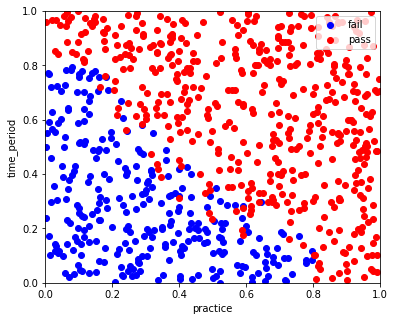

In [52]:
#### 数据集图形可视化
plt.figure(figsize = (6,5))
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.scatter(practice_fail, time_period_fail, color = 'b', label='fail')
plt.scatter(practice_pass, time_period_pass, color = 'r', label='pass')
plt.xlabel('practice')
plt.ylabel('time_period')
plt.legend(loc='upper right')

### 2. 逻辑回归算法实现

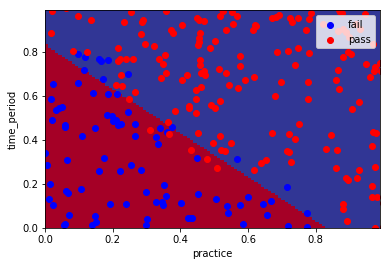

In [53]:
from sklearn.linear_model import LogisticRegression    #从sklearn中引入逻辑回归算法；必背；

clf_LR = LogisticRegression()     #定义了逻辑回归的分类器，clf_LR，初始化模型；
clf_LR.fit(features_train,label_train)     #机器学习的核心语句，必背；fit就是训练和学习的过程；
pred_LR = clf_LR.predict(features_test)     #机器学习的核心语句，必背；predict预测测试集的标签；返回的是预测的测试集的label

#测试集的分类效果可视化；传入已经学习好的分类器和测试集的特征，去预测测试集的标签，并且把分类结果可视化；
plot_pic(clf_LR, features_test, label_test)    

In [54]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred_LR, label_test)     #拿预测的测试集的label去跟真实的测试集的label去比较、打分
acc

0.93200000000000005

### 3. SVM支持向量机算法实现

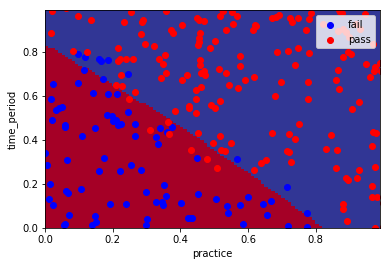

In [55]:
from sklearn.svm import SVC  #SVM下的分类问题；还有SVR；

clf_SVC = SVC()                               #默认的核函数就是rbf；
clf_SVC.fit(features_train,label_train)       #训练；
pred_SVC = clf_SVC.predict(features_test)     #返回是测试集的预测的label；

plot_pic(clf_SVC, features_test, label_test)

In [56]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred_SVC, label_test)    #拿预测的测试集的label去跟真实的测试集的label去比较、打分
acc

0.93200000000000005

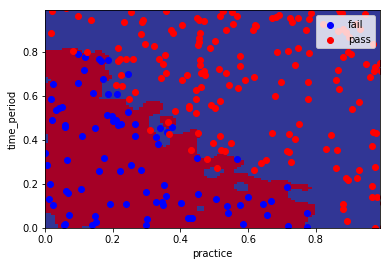

In [68]:
from sklearn.svm import SVC

clf_SVC2 = SVC(kernel = 'rbf',gamma = 1000 )      #gamma可以自己经验去定义；
clf_SVC2.fit(features_train,label_train)
pred_SVC2 = clf_SVC2.predict(features_test)

plot_pic(clf_SVC2, features_test, label_test)

In [69]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred_SVC2, label_test)
acc

0.96399999999999997

### 4. 决策树算法实现

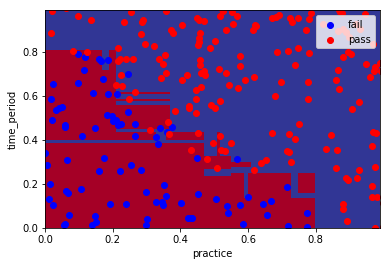

In [70]:
from sklearn.tree import DecisionTreeClassifier

clf_DT = DecisionTreeClassifier()
clf_DT.fit(features_train,label_train)
pred_DT = clf_DT.predict(features_test)

plot_pic(clf_DT,features_test, label_test)

In [71]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred_DT, label_test)
acc

0.94799999999999995

### 4.1. 随机森林的算法实现

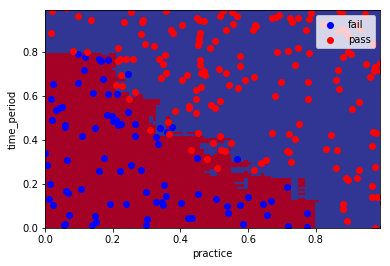

In [72]:
from sklearn.ensemble import RandomForestClassifier

clf_RF = RandomForestClassifier()
clf_RF.fit(features_train,label_train)
pred_RF = clf_RF.predict(features_test)

plot_pic(clf_RF,features_test, label_test)

In [73]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred_RF, label_test)
acc

0.94399999999999995

### 5. KNN算法实现

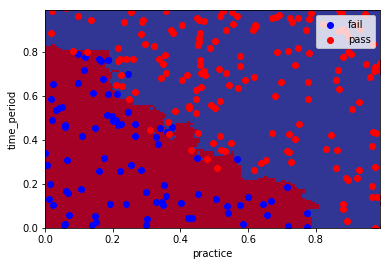

In [80]:
from sklearn.neighbors import KNeighborsClassifier

clf_KNN = KNeighborsClassifier(n_neighbors=7)
clf_KNN.fit(features_train,label_train)
pred_KNN = clf_KNN.predict(features_test)

plot_pic(clf_KNN, features_test, label_test)

In [81]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred_KNN, label_test)
acc

0.95599999999999996

### 6. 朴素贝叶斯算法实现

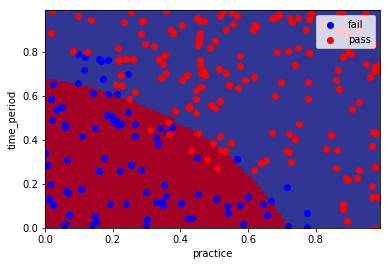

In [84]:
from sklearn.naive_bayes import GaussianNB

clf_NB = GaussianNB()    # 初始化模型
clf_NB.fit(features_train,label_train)    # 使用训练集对模型进行训练
pred_NB = clf_NB.predict(features_test)    # 使用测试集合对结果进行预测

# 输出可视化图形
plot_pic(clf_NB, features_test, label_test)

In [85]:
# 模型评估
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred_NB, label_test)
acc

0.91200000000000003

声明：本资料仅供内部学习交流使用，切勿外传。